### Computational Guided Inquiry for Modeling Earth's Climate (Neshyba, 2025)

# Scheduled Flows with Long-term Emissions

## Overview
The idea of this module is to create an emissions scenario -- a _schedule_ -- that describes how much carbon humans have released to the atmosphere in the past, and that makes projections about future emissions. We've done this before (ScheduledFlows), but this will allow us to specify long-term emissions.

## Skills

- I know how to use the function ScheduledFlowsWithLTE to generate an emissions scenario.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rc("figure", figsize=(12,8))
import meclib.cl as cl

### Using ScheduledFlowsWithLTE
In the cell below, we calculate and plot an emissions scenario, $\epsilon (t)$, using MakeEmissionsScenarioLTE (which includes long-term emissions).

peak 21.258199757482114 464


Text(0, 0.5, 'GtC/year')

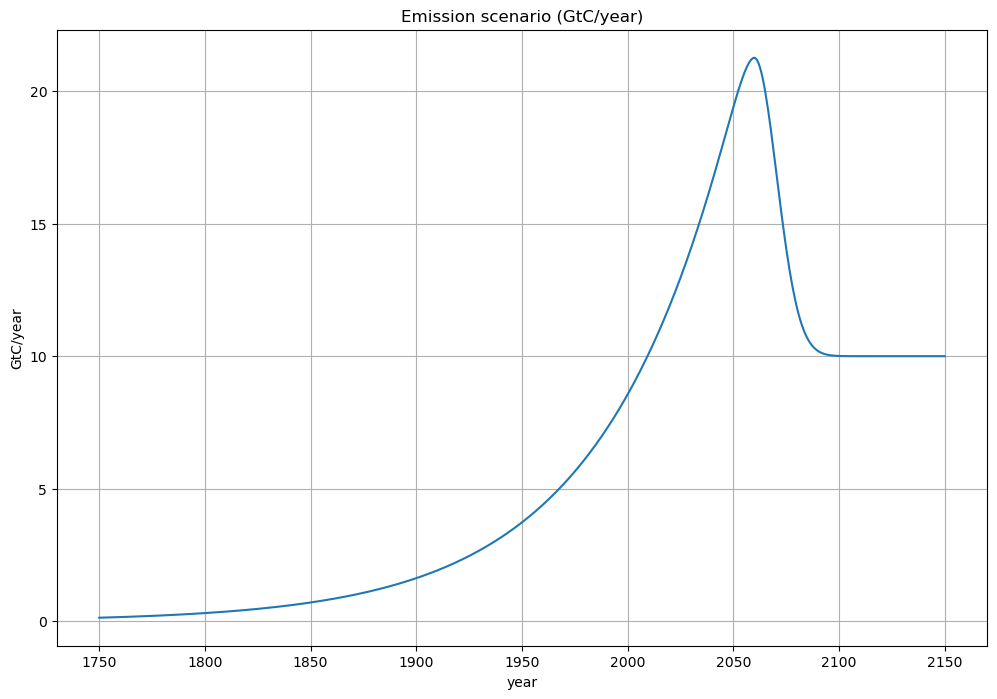

In [4]:
# Parameters
t_start = 1750
t_stop = 2150
nsteps = 600
t = np.linspace(t_start,t_stop,nsteps)
t_peak = 2060
t_decarb = 15
k = 0.0166
t_0 = 2003
eps_0 = 9
epslongterm = 10

# Create the scenario
t, myeps = cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,t_decarb,epslongterm)

# Plot the scenario
plt.figure()
plt.plot(t,myeps)
plt.grid(True)
plt.title('Emission scenario (GtC/year)')
plt.xlabel('year')
plt.ylabel('GtC/year')

### Your turn
In the cell below, create another emissions scenario using cl.MakeEmissionsScenarioLTE. The parameters can be whatever you like, but you should make at least two changes:

- give it a lower long-term emissions amount (since 10 GtC/year is far too high)
- give it an earlier peak emissions year (since 2060 is too late)

Then plot myeps as a function of time (t) to make sure it looks OK.

peak 15.252233588429393 434


Text(0, 0.5, 'GtC/year')

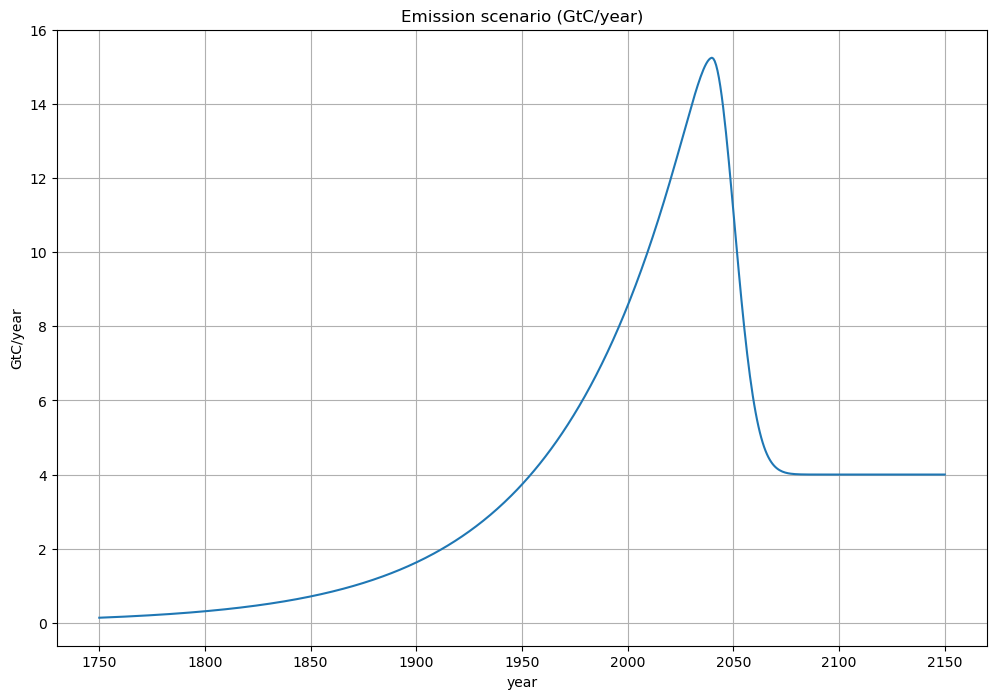

In [6]:
### BEGIN SOLUTION

epslongterm = 4
t_peak = 2040
t, myeps = cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,t_decarb,epslongterm)

# Plot the scenario
plt.figure()
plt.plot(t,myeps)
plt.grid(True)
plt.title('Emission scenario (GtC/year)')
plt.xlabel('year')
plt.ylabel('GtC/year')

### END SOLUTION

### Saving your emissions scenario
In the cell below we create the dictionary, etc., and save it to a file. You can use this as-is.

In [8]:
# Create an empty dictionary
epsdictionary = dict()

# Create an empty dataframe
epsdf = pd.DataFrame()

# Insert the time and emissions columns into the dataframe
epsdf.insert(loc=0, column='time', value=t)
epsdf.insert(loc=1, column='emissions', value=myeps)

# Add the dataframe to the dictionary
epsdictionary['dataframe']=epsdf

# Add metadata
epsdictionary['t_0'] = t_0
epsdictionary['eps_0'] = eps_0
epsdictionary['t_peak'] = t_peak
epsdictionary['t_decarb'] = t_decarb
epsdictionary['k'] = k

# Report the contents of the dictionary
display(epsdictionary)

{'dataframe':             time  emissions
 0    1750.000000   0.134987
 1    1750.667780   0.136492
 2    1751.335559   0.138013
 3    1752.003339   0.139552
 4    1752.671119   0.141107
 ..           ...        ...
 595  2147.328881   4.000000
 596  2147.996661   4.000000
 597  2148.664441   4.000000
 598  2149.332220   4.000000
 599  2150.000000   4.000000
 
 [600 rows x 2 columns],
 't_0': 2003,
 'eps_0': 9,
 't_peak': 2040,
 't_decarb': 15,
 'k': 0.0166}

### Saving your emissions scenario
Use the cell below to save your emissions scenario (the entire dictionary -- data and metadata) as a file. Here's some sample code -- although you might want to modify the filename to something more meaningful, especially since we'll be eventually saving multiple scenarios.

    # Decide on a name for the file, and then save to that file
    filename = 'Peaks_in_2040_LTE.pkl'
    cl.SaveMyScenario(epsdictionary, filename)

peak 15.252233588429393 434
peak 15.252233588429393 434
peak 15.252233588429393 434
peak 15.252233588429393 434
peak 15.252233588429393 434
peak 15.252233588429393 434
peak 25.097037699617005 479
peak 18.006534811221623 449
peak 12.91922296326803 419
peak 11.571316374773483 434
peak 12.607479399207316 412


{'dataframe':             time  emissions
 0    1750.000000   0.134987
 1    1750.667780   0.136492
 2    1751.335559   0.138013
 3    1752.003339   0.139552
 4    1752.671119   0.141107
 ..           ...        ...
 595  2147.328881   3.000000
 596  2147.996661   3.000000
 597  2148.664441   3.000000
 598  2149.332220   3.000000
 599  2150.000000   3.000000
 
 [600 rows x 2 columns],
 't_0': 2003,
 'eps_0': 9,
 't_peak': 2025,
 't_decarb': 5,
 'k': 0.0166,
 'LTE': 3}

{'dataframe':             time  emissions
0    1750.000000   0.134987
1    1750.667780   0.136492
2    1751.335559   0.138013
3    1752.003339   0.139552
4    1752.671119   0.141107
..           ...        ...
595  2147.328881   3.000000
596  2147.996661   3.000000
597  2148.664441   3.000000
598  2149.332220   3.000000
599  2150.000000   3.000000

[600 rows x 2 columns], 't_0': 2003, 'eps_0': 9, 't_peak': 2025, 't_decarb': 5, 'k': 0.0166, 'LTE': 3}


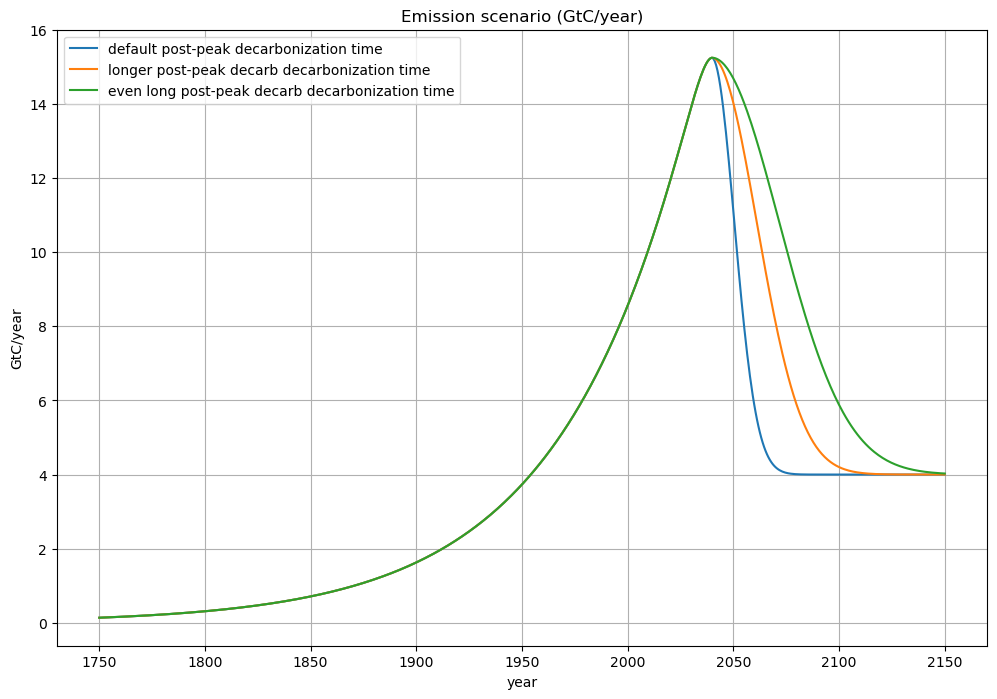

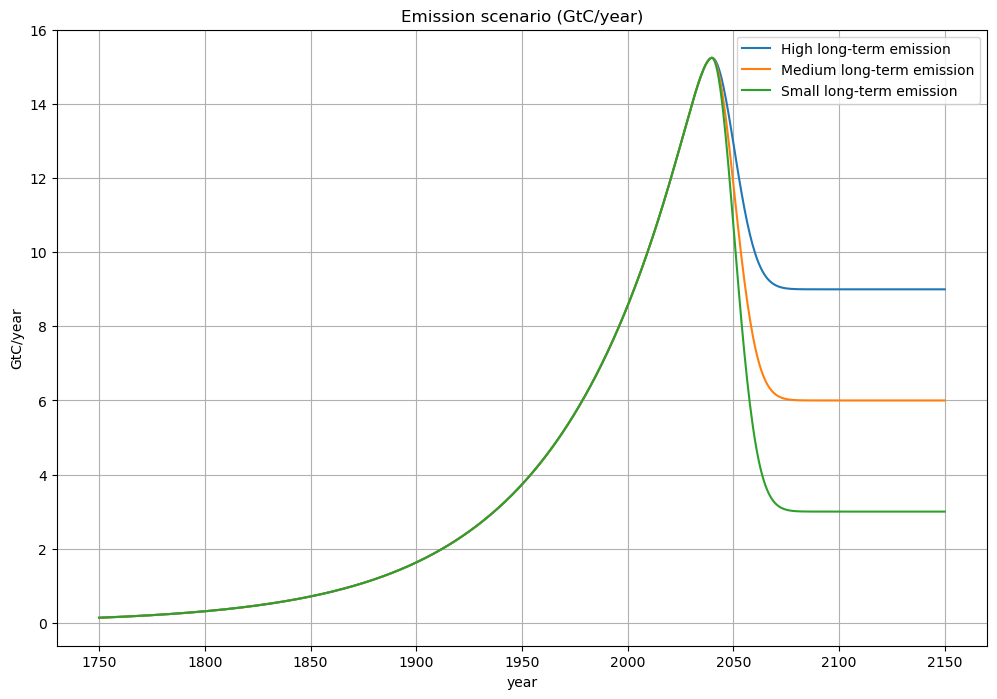

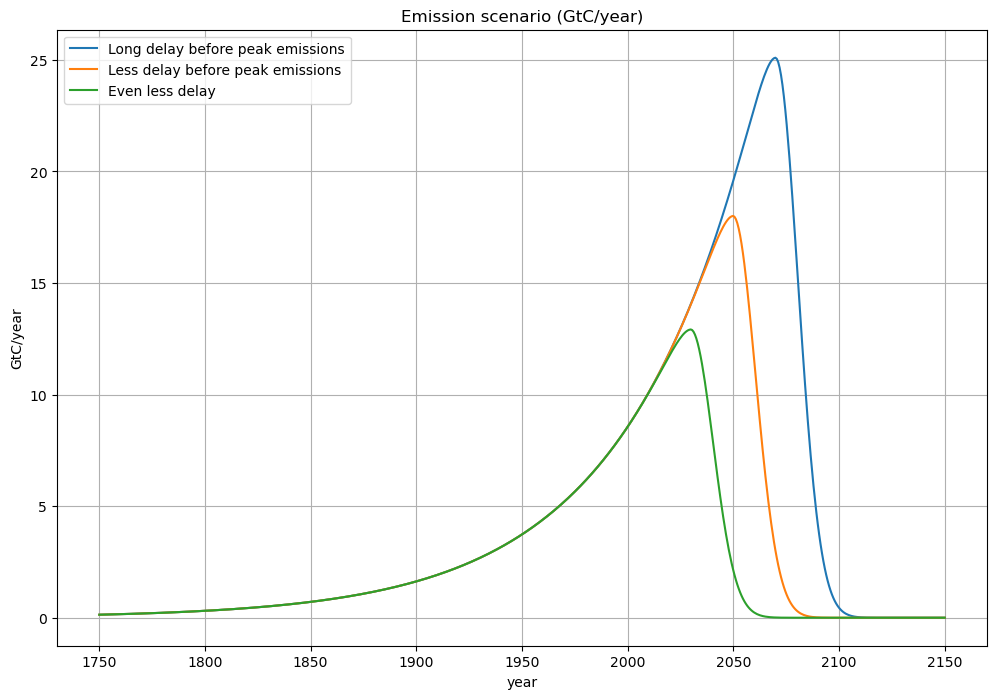

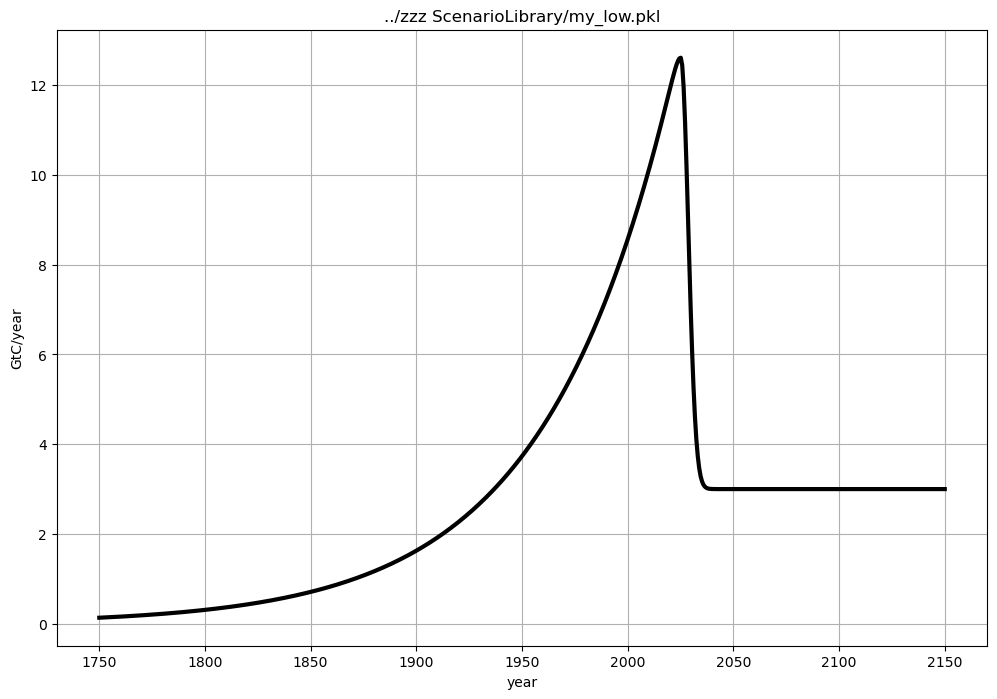

In [10]:
# Assign a name for the file, and save it
### BEGIN SOLUTION

filename = '../zzz ScenarioLibrary/Peaks_in_2040_LTE.pkl'
cl.SaveMyScenario(epsdictionary, filename)

# Not part of the solution, making other scenarios
# Create the scenarios
t1, myeps1=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,t_decarb,epslongterm,1)
t2, myeps2=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,t_decarb,epslongterm,2)
t3, myeps3=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,t_decarb,epslongterm,3)

# Plot the scenario
plt.figure()
plt.plot(t1,myeps1,label='default post-peak decarbonization time')
plt.plot(t2,myeps2,label='longer post-peak decarb decarbonization time')
plt.plot(t3,myeps3,label='even long post-peak decarb decarbonization time')
plt.grid(True)
plt.title('Emission scenario (GtC/year)')
plt.xlabel('year')
plt.ylabel('GtC/year')
plt.legend()

# Create the scenarios
t1, myeps1=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,t_decarb,9)
t2, myeps2=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,t_decarb,6)
t3, myeps3=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,t_decarb,3)

# Plot the scenario
plt.figure()
plt.plot(t1,myeps1,label='High long-term emission')
plt.plot(t2,myeps2,label='Medium long-term emission')
plt.plot(t3,myeps3,label='Small long-term emission')
plt.grid(True)
plt.title('Emission scenario (GtC/year)')
plt.xlabel('year')
plt.ylabel('GtC/year')
plt.legend()

# Create the scenarios
t1, myeps1=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,2070,t_decarb,0)
t2, myeps2=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,2050,t_decarb,0)
t3, myeps3=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,2030,t_decarb,0)

# Plot the scenario
plt.figure()
plt.plot(t1,myeps1,label='Long delay before peak emissions')
plt.plot(t2,myeps2,label='Less delay before peak emissions')
plt.plot(t3,myeps3,label='Even less delay')
plt.grid(True)
plt.title('Emission scenario (GtC/year)')
plt.xlabel('year')
plt.ylabel('GtC/year')
plt.legend()




# # Not part of the solution, it's making an RCP4.5 lookalike
# # t, myeps = cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,55,4.2,.5)
# t, myeps4 = cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,55,4.129,.45)
# # Create an empty dictionary
# epsdictionary = dict()

# # Create an empty dataframe
# epsdf = pd.DataFrame()

# # Insert the time and emissions columns into the dataframe
# epsdf.insert(loc=0, column='time', value=t)
# epsdf.insert(loc=1, column='emissions', value=myeps)

# # Add the dataframe to the dictionary
# epsdictionary['dataframe']=epsdf

# # Add metadata
# epsdictionary['t_0'] = t_0
# epsdictionary['eps_0'] = eps_0
# epsdictionary['t_peak'] = t_peak
# epsdictionary['t_decarb'] = 55
# epsdictionary['k'] = k
# epsdictionary['LTE'] = 4.2

# # Report the contents of the dictionary
# display(epsdictionary)
# filename = '../zzz ScenarioLibrary/RCP4_5.pkl'
# cl.SaveMyScenario(epsdictionary, filename)
# dummy = cl.LoadMyScenario(filename,verbose=True)


# Not part of the solution, it's making an RCP4.5 lookalike
# t, myeps = cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,55,4.2,.5)
# t, myeps4 = cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,55,4.129,.45)
t, myeps_low = cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,t_peak,55,4.129,.45)

t_low, myeps_low=cl.MakeEmissionsScenarioLTE(t_start,t_stop,nsteps,k,eps_0,t_0,2025,5,3)


# Create an empty dictionary
epsdictionary = dict()

# Create an empty dataframe
epsdf = pd.DataFrame()

# Insert the time and emissions columns into the dataframe
epsdf.insert(loc=0, column='time', value=t_low)
epsdf.insert(loc=1, column='emissions', value=myeps_low)

# Add the dataframe to the dictionary
epsdictionary['dataframe']=epsdf

# Add metadata
epsdictionary['t_0'] = t_0
epsdictionary['eps_0'] = eps_0
epsdictionary['t_peak'] = 2025
epsdictionary['t_decarb'] = 5
epsdictionary['k'] = k
epsdictionary['LTE'] = 3

# Report the contents of the dictionary
display(epsdictionary)
filename = '../zzz ScenarioLibrary/RCP4_5.pkl'
cl.SaveMyScenario(epsdictionary, '../zzz ScenarioLibrary/my_low.pkl')
dummy = cl.LoadMyScenario('../zzz ScenarioLibrary/my_low.pkl',verbose=True)


### END SOLUTION

### Validating and finishing up
Assuming all this has gone smoothly, don't forget to do a Kernel/Restart & Run All, run the whole notebook, and make sure there aren't any errors.